# Emission Impact Analysis (Case: 5bus_nrel)

In this analysis, we want to study the emissions Impact of virtual bids/offers in a grid

## Dependencies and Data Preparation

#### Packages and Diretory

In [1]:
#make sure it is in "GridAnalysis.jl" cd("C:/Users/Daniele/Desktop/Projeto/GridAnalysis.jl")

In [15]:
pwd()

"C:\\Users\\Daniele\\Desktop\\Projeto\\GridAnalysis.jl"

In [16]:
using Pkg
Pkg.activate("./examples/5bus_nrel/emission_impact_analysis_5bus_nrel")

In [17]:
Pkg.instantiate()

In [18]:
using Logging 
Logging.disable_logging(Logging.Info) #script to disable info messages 
Logging.disable_logging(Logging.Warn) #script to disable warning messages

LogLevel(1001)

In [19]:
using Dates
using DataFrames
using GridAnalysis
using Gurobi
using PowerSystems
using PowerSimulations
using Test
using Measures
using Plots

#### Uploading Utils

Might not work if running lines manually 
(solution: edit to be the path for this examples directory for example: 'example_dir = "./examples/5bus_nrel/"')

In [20]:
example_dir = "./examples/5bus_nrel/"
data_dir = joinpath(example_dir, "data")
include(joinpath(example_dir, "utils.jl"))

load_plot_set_of_simulations

#### Data Prep and Build Market Simulator
define solvers for Unit Commitment (UC), Real Time (RT) and Economic Dispatch (ED)

In [21]:
solver_uc = optimizer_with_attributes(Gurobi.Optimizer)
solver_rt = optimizer_with_attributes(Gurobi.Optimizer)
solver_ed = optimizer_with_attributes(Gurobi.Optimizer)

MathOptInterface.OptimizerWithAttributes(Gurobi.Optimizer, Pair{MathOptInterface.AbstractOptimizerAttribute, Any}[])

## Define analysis to be done

In [22]:
Network = [DCPPowerModel];
Ramp = [true];
Minimal_generation = [true];
Reserve = [true];
Offer_Bus = ["bus1", "bus2", "bus3", "bus4", "bus5"];
bidding_period = [collect(1:24)];

#### Create a DataFrame where each line represents one analysis 

In [23]:
df = DataFrame(Network = [], 
               Ramp = [],
               Minimal_generation = [],
               Reserve = [],
               Offer_Bus = [],
               bidding_period = []) 

for a in Network 
    for b in Ramp 
        for c in Minimal_generation 
            for d in Reserve
                for e in Offer_Bus
                    for f in bidding_period
                        new_data = DataFrame(Network = [Dict("DA"=>a, "RT"=>a)], 
                        Ramp = [Dict("DA"=>b, "RT"=>b)],
                        Minimal_generation = [Dict("DA"=>c, "RT"=>c)],
                        Reserve = [d],
                        Offer_Bus = [e],
                        bidding_period = [f])
                        append!(df, new_data)
                    end
                end
            end
        end
    end
end
df[!,5]

5-element Vector{Any}:
 "bus1"
 "bus2"
 "bus3"
 "bus4"
 "bus5"

#### Define range quota and period to be analysed

In [24]:
range_quota = Float64.(collect(0:0.1:4));
initial_time = Date("2020-01-01");
period_analysed = [5,19];
initial_bidding_time = DateTime("2020-01-01");
path = "results";

## Run & Load all the simulations

In [25]:
run_set_of_simulations(df, data_dir, example_dir, solver_uc, solver_ed, solver_rt,
    range_quota, initial_time, initial_bidding_time, path)

In [27]:
lines=[1,2,3,4,5]
period_analysed=[[5],[19]] 

2-element Vector{Vector{Int64}}:
 [5]
 [19]

### Generate graphics 

#### Generation stack virtual

In [28]:
graphic="plot_generation_stack_virtual"
plt_g=load_plot_set_of_simulations(
    df, 
    data_dir, 
    example_dir, 
    solver_uc, 
    solver_ed, 
    solver_rt, 
    range_quota, 
    initial_time,
    lines,
    period_analysed,
    initial_bidding_time,
    path,
    graphic,
    true,
)

        1 arquivo(s) copiado(s).
        1 arquivo(s) copiado(s).
        1 arquivo(s) copiado(s).
        1 arquivo(s) copiado(s).
        1 arquivo(s) copiado(s).
        1 arquivo(s) copiado(s).
        1 arquivo(s) copiado(s).
        1 arquivo(s) copiado(s).
        1 arquivo(s) copiado(s).
        1 arquivo(s) copiado(s).


5×2×2 Array{Any, 3}:
[:, :, 1] =
 Plot{Plots.GRBackend() n=6}  Plot{Plots.GRBackend() n=6}
 Plot{Plots.GRBackend() n=6}  Plot{Plots.GRBackend() n=6}
 Plot{Plots.GRBackend() n=6}  Plot{Plots.GRBackend() n=6}
 Plot{Plots.GRBackend() n=6}  Plot{Plots.GRBackend() n=6}
 Plot{Plots.GRBackend() n=6}  Plot{Plots.GRBackend() n=6}

[:, :, 2] =
 Plot{Plots.GRBackend() n=5}  Plot{Plots.GRBackend() n=5}
 Plot{Plots.GRBackend() n=5}  Plot{Plots.GRBackend() n=5}
 Plot{Plots.GRBackend() n=5}  Plot{Plots.GRBackend() n=5}
 Plot{Plots.GRBackend() n=5}  Plot{Plots.GRBackend() n=5}
 Plot{Plots.GRBackend() n=5}  Plot{Plots.GRBackend() n=5}

#### Revenue curves (renewable plus virtual)

In [15]:
graphic="plot_revenue_curves_renewable_plus_virtual"
plt_rv=load_plot_set_of_simulations(
    df, 
    data_dir, 
    example_dir, 
    solver_uc, 
    solver_ed, 
    solver_rt, 
    range_quota, 
    initial_time,
    lines,
    period_analysed,
    initial_bidding_time,
    path,
    graphic,
    true,
)

        1 arquivo(s) copiado(s).
        1 arquivo(s) copiado(s).
        1 arquivo(s) copiado(s).
        1 arquivo(s) copiado(s).
        1 arquivo(s) copiado(s).
        1 arquivo(s) copiado(s).
        1 arquivo(s) copiado(s).
        1 arquivo(s) copiado(s).
        1 arquivo(s) copiado(s).
        1 arquivo(s) copiado(s).


5-element Vector{Any}:
 Plot{Plots.GRBackend() n=9}
 Plot{Plots.GRBackend() n=9}
 Plot{Plots.GRBackend() n=9}
 Plot{Plots.GRBackend() n=9}
 Plot{Plots.GRBackend() n=9}

### Coal commitments: Can virtual bid/offers reduce coal commitments in DA and/or RT dispatch?

Generation - virtual offer on Bus1

In [12]:
plot(plt_g[1,1,1], plt_g[1,1,2],plt_g[1,2,1], plt_g[1,2,2],layout=4,title=["DA: 4hrs" "RT: 4hrs" "DA: 18hrs" "RT: 18hrs"])

LoadError: UndefVarError: plt_g not defined

Economic viability

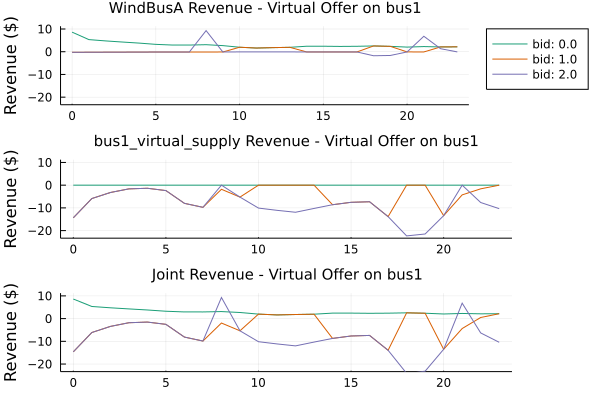

In [17]:
plt_rv[1]

Generation - virtual offer on Bus2

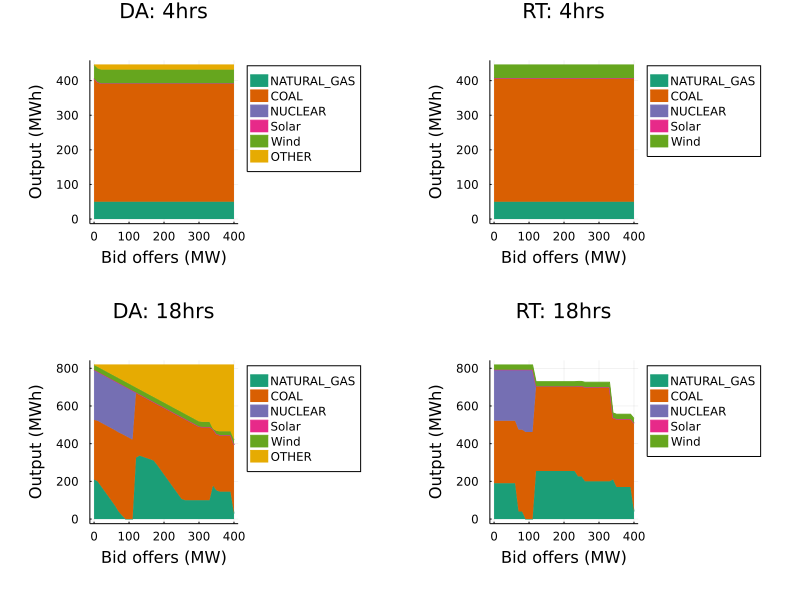

In [18]:
plot(plt_g[2,1,1], plt_g[2,1,2],plt_g[2,2,1], plt_g[2,2,2],layout=4,title=["DA: 4hrs" "RT: 4hrs" "DA: 18hrs" "RT: 18hrs"])

Economic viability

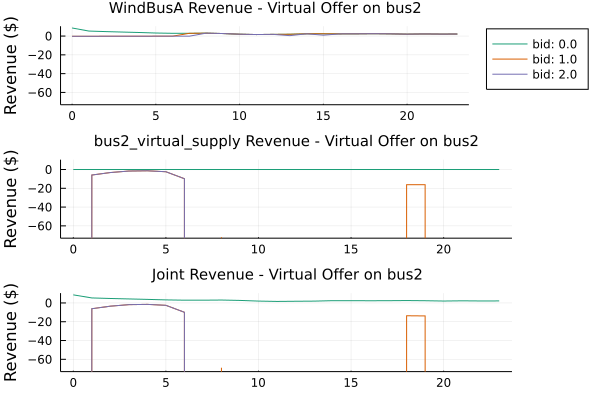

In [19]:
plt_rv[2]

Generation - virtual offer on Bus3

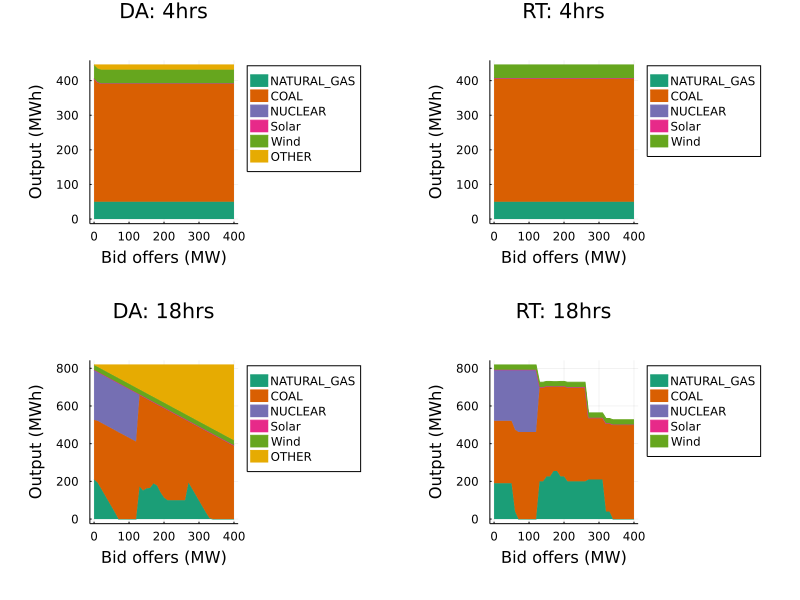

In [20]:
plot(plt_g[3,1,1], plt_g[3,1,2],plt_g[3,2,1], plt_g[3,2,2],layout=4,title=["DA: 4hrs" "RT: 4hrs" "DA: 18hrs" "RT: 18hrs"])

Economic viability

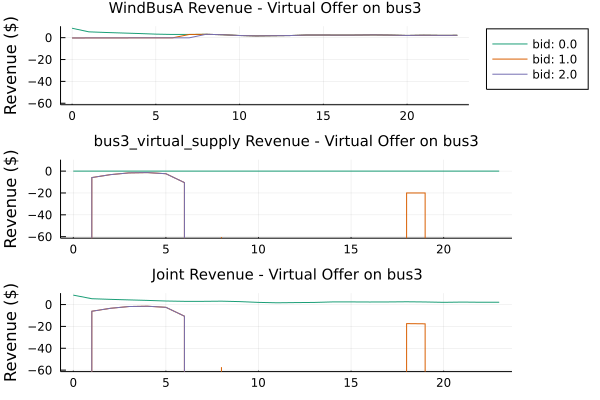

In [21]:
plt_rv[3]

Generation - virtual offer on Bus4

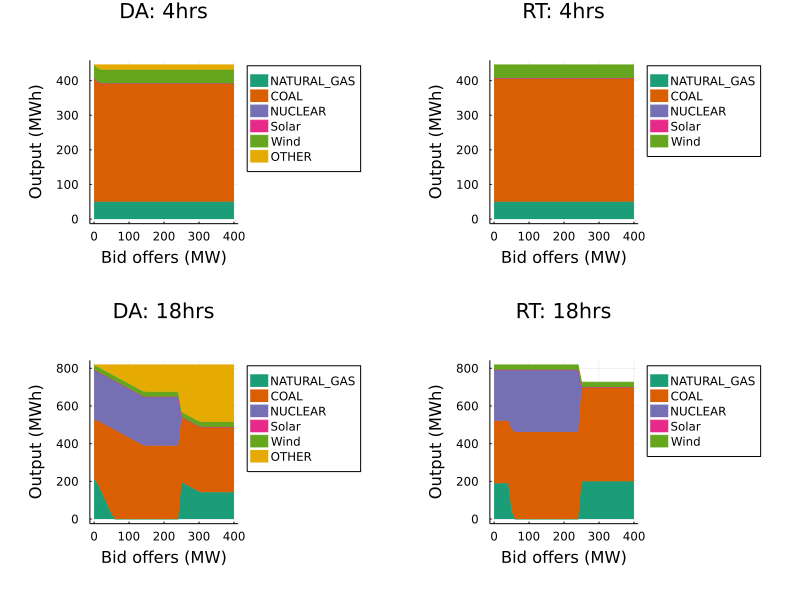

In [22]:
plot(plt_g[4,1,1], plt_g[4,1,2],plt_g[4,2,1], plt_g[4,2,2],layout=4,title=["DA: 4hrs" "RT: 4hrs" "DA: 18hrs" "RT: 18hrs"])

Economic viability

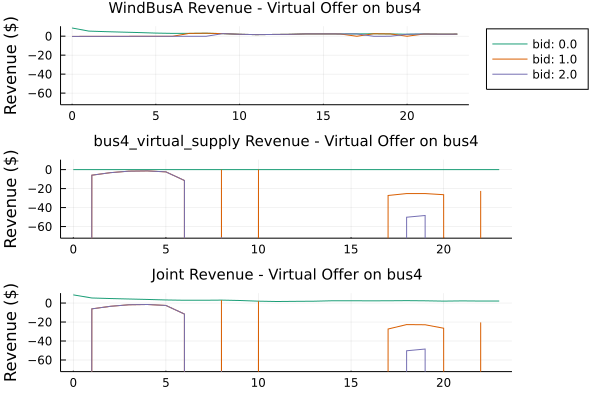

In [25]:
plt_rv[4]

Generation - virtual offer on Bus5

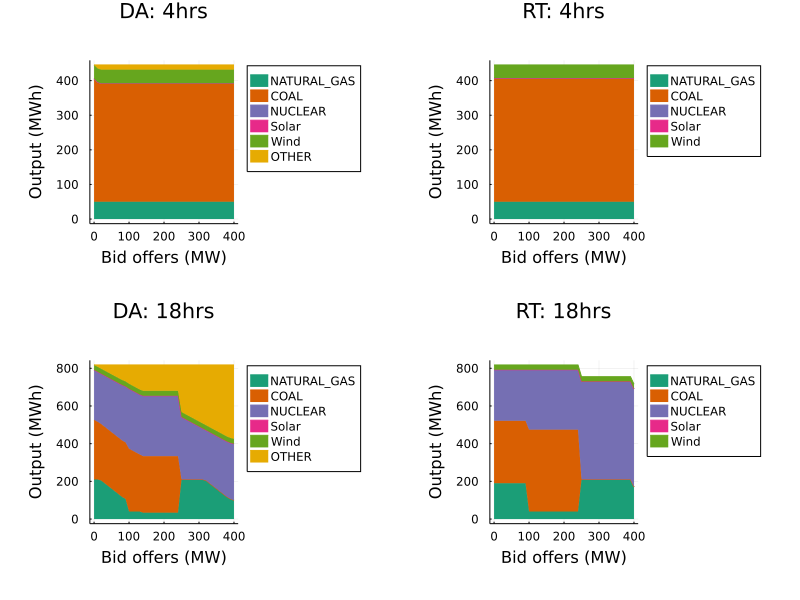

In [26]:
plot(plt_g[5,1,1], plt_g[5,1,2],plt_g[5,2,1], plt_g[5,2,2],layout=4,title=["DA: 4hrs" "RT: 4hrs" "DA: 18hrs" "RT: 18hrs"])

Economic viability

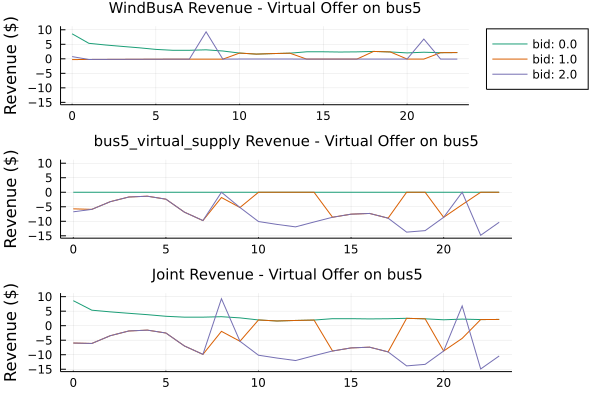

In [27]:
plt_rv[5]

### Balanced and imbalanced bids/offers: Do they have different impacts?